In [26]:
import numpy as np

from bokeh.io import output_notebook

from bokeh.layouts import row, column, widgetbox, Spacer, layout
from bokeh.models import CustomJS, ColumnDataSource, Slider, ColorBar, LinearColorMapper

from bokeh.plotting import figure, output_file, show, ColumnDataSource

%matplotlib inline 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage

# Physical constants
m_e = 1e-27
m_p = 1836 * m_e
c = 3e10
k_B = 1.4e-16
h = 2 * np.pi * 1e-27
h_bar = 1e-27
steph_boltz = 6e-5
a_0 = 5e-9
e = 5e-10
eV = 1.6e-12

def planck(nu, T):
    return 2 * h * nu ** 3 / (c ** 2 * (np.exp(h * nu / (k_B * T)) - 1))

T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

ratio = 1.004
Y = (planck(nu / ratio, T) - planck(nu, T)) / (1e-23 * 1e6)
X = nu / 1e9

pt_x = [X[0]]
pt_y = [Y[0]]

pt_source = ColumnDataSource(data=dict(pt_x=pt_x, 
                                       pt_y=pt_y))


plot = figure(x_axis_type="log")
plot.line(X, 
          Y, 
          line_width=3, 
          line_alpha=0.6)
plot.line(X, 
          Y * 0, 
          line_width=3, 
          line_alpha=0.6,
          line_dash='dashed', 
          line_color='black')
plot.circle('pt_x', 
            'pt_y', 
            source=pt_source, 
            size=20, 
            color="red", 
            alpha=0.5)


# 2d plot
N = 500
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
xx, yy = np.meshgrid(x, y)
d = ndimage.gaussian_filter(np.random.normal(scale=20, 
                                             size=(N,N)), 
                            sigma=20)

x_min = 300
x_max = 400
y_min = 200
y_max = 300

region_indices = []
for i in range(x_min, x_max):
    for j in range(y_min, y_max):
        region_indices.append((N * i + j, d[i,j]))
        d[i,j] += Y[0]

p = figure(x_range=(0, 1), y_range=(0, 1),
           tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])

color_mapper = LinearColorMapper(palette="Viridis256", 
                                 low=-3, 
                                 high=3)

im_source = ColumnDataSource(data=dict(image=[d]))

p.image('image', 
        x=0, 
        y=0, 
        dw=1, 
        dh=1, 
        color_mapper=color_mapper, 
        source=im_source)

color_bar = ColorBar(color_mapper=color_mapper, 
                     location=(0, 0))

p.add_layout(color_bar, 
             'right')

callback = CustomJS(args=dict(pt_source=pt_source, 
                              im_source=im_source,
                              region_indices=region_indices,
                              X=X,
                              Y=Y,
                              N=500), code="""
    var pt_data = pt_source.data;
    var im_data = im_source.data;
    
    var image = im_data['image'];
    
    var pt_x = pt_data['pt_x']
    var pt_y = pt_data['pt_y']
    
    var index = freq.value;
    pt_x[0] = X[index];
    pt_y[0] = Y[index];
    
    for (var i = 0; i < region_indices.length; i++) {
        image[0][region_indices[i][0]] = region_indices[i][1] + pt_y[0];
    }
    
    pt_source.change.emit();
    im_source.change.emit();
""")

freq_slider = Slider(start=0, 
                     end=len(nu) - 1, 
                     value=0, 
                     step=1,
                     title="Frequency Index", 
                     callback=callback)
callback.args["freq"] = freq_slider

l = layout([widgetbox(freq_slider), 
            [plot, p]], 
           sizing_mode='scale_width')

# output_file("slider.html", title="slider.py example")
output_notebook()

show(l)

Loading BokehJS ...

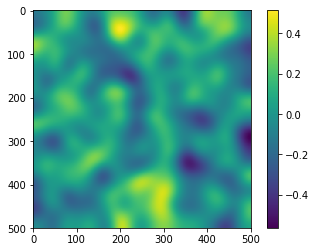

In [44]:
# 2d plot
from scipy import ndimage

N = 500
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
xx, yy = np.meshgrid(x, y)
d = scipy.ndimage.gaussian_filter(np.random.normal(scale=10, size=(N,N)), sigma=20)
# d = np.random.normal(scale=10, size=(N,N))

plt.imshow(d)
plt.colorbar()
plt.show()

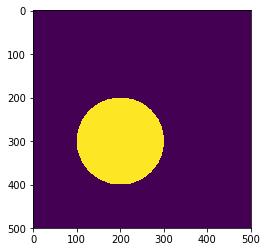

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 500)
y = np.arange(0, 500)
arr = np.zeros((y.size, x.size))

cx = 200.
cy = 300.
r = 100.

# The two lines below could be merged, but I stored the mask
# for code clarity.
mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
arr[mask] = 123.

# This plot shows that only within the circle the value is set to 123.
plt.figure()
plt.imshow(arr)
# plt.colorbar()
plt.show()

In [61]:
import numpy as np

from bokeh.io import output_notebook

from bokeh.layouts import row, column, widgetbox, Spacer, layout
from bokeh.models import CustomJS, ColumnDataSource, Slider, ColorBar, LinearColorMapper

from bokeh.plotting import figure, output_file, show, ColumnDataSource

%matplotlib inline 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage

# Physical constants
m_e = 1e-27
m_p = 1836 * m_e
c = 3e10
k_B = 1.4e-16
h = 2 * np.pi * 1e-27
h_bar = 1e-27
steph_boltz = 6e-5
a_0 = 5e-9
e = 5e-10
eV = 1.6e-12

def planck(nu, T):
    return 2 * h * nu ** 3 / (c ** 2 * (np.exp(h * nu / (k_B * T)) - 1))

T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

ratio = 1.004
Y = (planck(nu / ratio, T) - planck(nu, T)) / (1e-23 * 1e6)
X = nu / 1e9

pt_x = [X[0]]
pt_y = [Y[0]]

pt_source = ColumnDataSource(data=dict(pt_x=pt_x, 
                                       pt_y=pt_y))


plot = figure(x_axis_type="log")
plot.line(X, 
          Y, 
          line_width=3, 
          line_alpha=0.6)
plot.line(X, 
          Y * 0, 
          line_width=3, 
          line_alpha=0.6,
          line_dash='dashed', 
          line_color='black')
plot.circle('pt_x', 
            'pt_y', 
            source=pt_source, 
            size=20, 
            color="red", 
            alpha=0.5)

plot.xaxis.axis_label = 'Frequency (GHz)'
plot.xaxis.axis_label_text_font_style = 'normal'
plot.yaxis.axis_label = 'Change in Specific Intensity (MJy/sr)'
plot.yaxis.axis_label_text_font_style = 'normal'


# 2d plot
N = 500
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
xx, yy = np.meshgrid(x, y)
d = ndimage.gaussian_filter(np.random.normal(scale=30, 
                                             size=(N,N)), 
                            sigma=20)

# The two lines below could be merged, but I stored the mask
# for code clarity.
mask1 = (x[np.newaxis,:]-(200/500))**2 + (y[:,np.newaxis]-(300/500))**2 < (50/N)**2
mask2 = (x[np.newaxis,:]-(300/500))**2 + (y[:,np.newaxis]-(450/500))**2 < (40/N)**2
mask3 = (x[np.newaxis,:]-(400/500))**2 + (y[:,np.newaxis]-(100/500))**2 < (30/N)**2

region_indices = []
for i in range(N):
    for j in range(N):
        if mask1[i][j] or mask2[i][j] or mask3[i][j]:
            region_indices.append((N * i + j, d[i,j]))
            d[i,j] += Y[0]

p = figure(x_range=(0, 1), y_range=(0, 1),
           tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])

color_mapper = LinearColorMapper(palette="Viridis256", 
                                 low=-3, 
                                 high=3)

im_source = ColumnDataSource(data=dict(image=[d]))

p.image('image', 
        x=0, 
        y=0, 
        dw=1, 
        dh=1, 
        color_mapper=color_mapper, 
        source=im_source)

color_bar = ColorBar(color_mapper=color_mapper, 
                     location=(0, 0))

p.add_layout(color_bar, 
             'right')

p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'y'

callback = CustomJS(args=dict(pt_source=pt_source, 
                              im_source=im_source,
                              region_indices=region_indices,
                              X=X,
                              Y=Y,
                              N=500), code="""
    var pt_data = pt_source.data;
    var im_data = im_source.data;
    
    var image = im_data['image'];
    
    var pt_x = pt_data['pt_x']
    var pt_y = pt_data['pt_y']
    
    var index = freq.value;
    pt_x[0] = X[index];
    pt_y[0] = Y[index];
    
    for (var i = 0; i < region_indices.length; i++) {
        image[0][region_indices[i][0]] = region_indices[i][1] + pt_y[0];
    }
    
    pt_source.change.emit();
    im_source.change.emit();
""")

freq_slider = Slider(start=0, 
                     end=len(nu) - 1, 
                     value=0, 
                     step=1,
                     title="Frequency Index", 
                     callback=callback)
callback.args["freq"] = freq_slider

l = layout([widgetbox(freq_slider), 
            [plot, p]], 
           sizing_mode='scale_width')

output_file("sz_effect.html", title="Interactive Sunyaev-Zeldovich Effect")
# output_notebook()

show(l)